In [64]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dython

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Data Load & Preparation

In [50]:
df = pd.read_csv('Brazilian_ecommerce (merged).csv', index_col = 0)

# Preparation
for col in df.columns:
    if col.endswith('_timestamp') or col.endswith('_date') or col.endswith('_at'):
        try:
            df[col] = pd.to_datetime(df[col])
            # df[col] = pd.to_datetime(df[col]).dt.date
            # if col.endswith('_timestamp'):
                # df[col] = pd.to_datetime(df[col])
            # elif col.endswith('_date') or col.endswith('_at'):
                # df[col] = pd.to_datetime(df[col]).dt.date
                # df[col] = pd.to_datetime(df[col]).dt.to_period('M')
        except Exception as e:
            print(f'Error mengonversi kolom {col}: {e}')
            pass

display(df.head())
display(df.info())

,customer_id,customer_unique_id,order_id,seller_id,product_cat_name,order_item_count,shipping_limit_date,price,freight_value,payment_value,payment_type,payment_installments,payment_sequential,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,1,2017-05-03,239.90,19.93,259.83,credit_card,3,1,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,4,2017-05-13,2017-05-15 11:34:13,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,furniture_decor,1,2018-01-18,199.00,17.87,216.87,credit_card,5,1,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5,2018-01-23,2018-01-23 16:06:31,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,perfumery,1,2018-08-15,12.99,12.79,25.78,credit_card,2,1,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,4,2018-08-15,2018-08-15 16:39:01,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,garden_tools,1,2017-02-13,199.90,18.14,218.04,credit_card,3,1,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,5,2017-03-02,2017-03-03 10:54:59,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438
5,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,housewares,1,2017-05-23,21.90,12.69,34.59,boleto,1,1,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,4,2017-05-23,2017-05-24 19:00:09,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330


<class 'pandas.core.frame.DataFrame'>
Index: 96884 entries, 1 to 99693
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96884 non-null  object        
 1   customer_unique_id             96884 non-null  object        
 2   order_id                       96884 non-null  object        
 3   seller_id                      96884 non-null  object        
 4   product_cat_name               96884 non-null  object        
 5   order_item_count               96884 non-null  int64         
 6   shipping_limit_date            96884 non-null  datetime64[ns]
 7   price                          96884 non-null  float64       
 8   freight_value                  96884 non-null  float64       
 9   payment_value                  96884 non-null  float64       
 10  payment_type                   96884 non-null  object        
 11  payment_installments

None

# EDA

#### Descriptive Analysis

In [5]:
# Data Describe

df.select_dtypes(include = [int, float]).describe().round(2)

,order_item_count,price,freight_value,payment_value,payment_installments,payment_sequential,review_score,customer_zip_code_prefix,customer_lat,customer_lng,seller_zip_code_prefix,seller_lat,seller_lng
count,96884.00,96884.00,96884.00,96884.00,96884.00,96884.00,96884.00,96884.00,96884.00,96884.00,96884.00,96884.00,96884.00
mean,1.12,133.89,22.30,156.60,2.90,1.02,4.13,35141.15,-21.20,-46.19,24580.71,-22.80,-47.23
std,0.50,205.27,20.96,214.93,2.71,0.32,1.30,29833.90,5.60,4.06,27703.85,2.75,2.35
min,1.00,0.85,0.00,0.01,0.00,1.00,1.00,1003.00,-33.69,-72.67,1001.00,-32.07,-63.89
25%,1.00,45.00,13.67,59.18,1.00,1.00,4.00,11330.00,-23.59,-48.12,6429.00,-23.61,-48.83
50%,1.00,84.50,17.00,102.64,2.00,1.00,5.00,24431.00,-22.92,-46.63,13566.00,-23.42,-46.75
75%,1.00,149.00,23.60,174.90,4.00,1.00,5.00,58748.50,-20.14,-43.63,29156.00,-21.76,-46.52
max,21.00,13440.00,1794.96,13664.08,24.00,25.00,5.00,99980.00,42.18,-7.74,99730.00,-2.50,-34.86


### **Cohort Analysis**

In [6]:
df_cohort = df.copy()
df_cohort.head()

,customer_id,customer_unique_id,order_id,seller_id,product_cat_name,order_item_count,shipping_limit_date,price,freight_value,payment_value,payment_type,payment_installments,payment_sequential,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,1,2017-05-03,239.90,19.93,259.83,credit_card,3,1,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,4,2017-05-13,2017-05-15 11:34:13,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,furniture_decor,1,2018-01-18,199.00,17.87,216.87,credit_card,5,1,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5,2018-01-23,2018-01-23 16:06:31,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,perfumery,1,2018-08-15,12.99,12.79,25.78,credit_card,2,1,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,4,2018-08-15,2018-08-15 16:39:01,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,garden_tools,1,2017-02-13,199.90,18.14,218.04,credit_card,3,1,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,5,2017-03-02,2017-03-03 10:54:59,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438
5,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,housewares,1,2017-05-23,21.90,12.69,34.59,boleto,1,1,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,4,2017-05-23,2017-05-24 19:00:09,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330


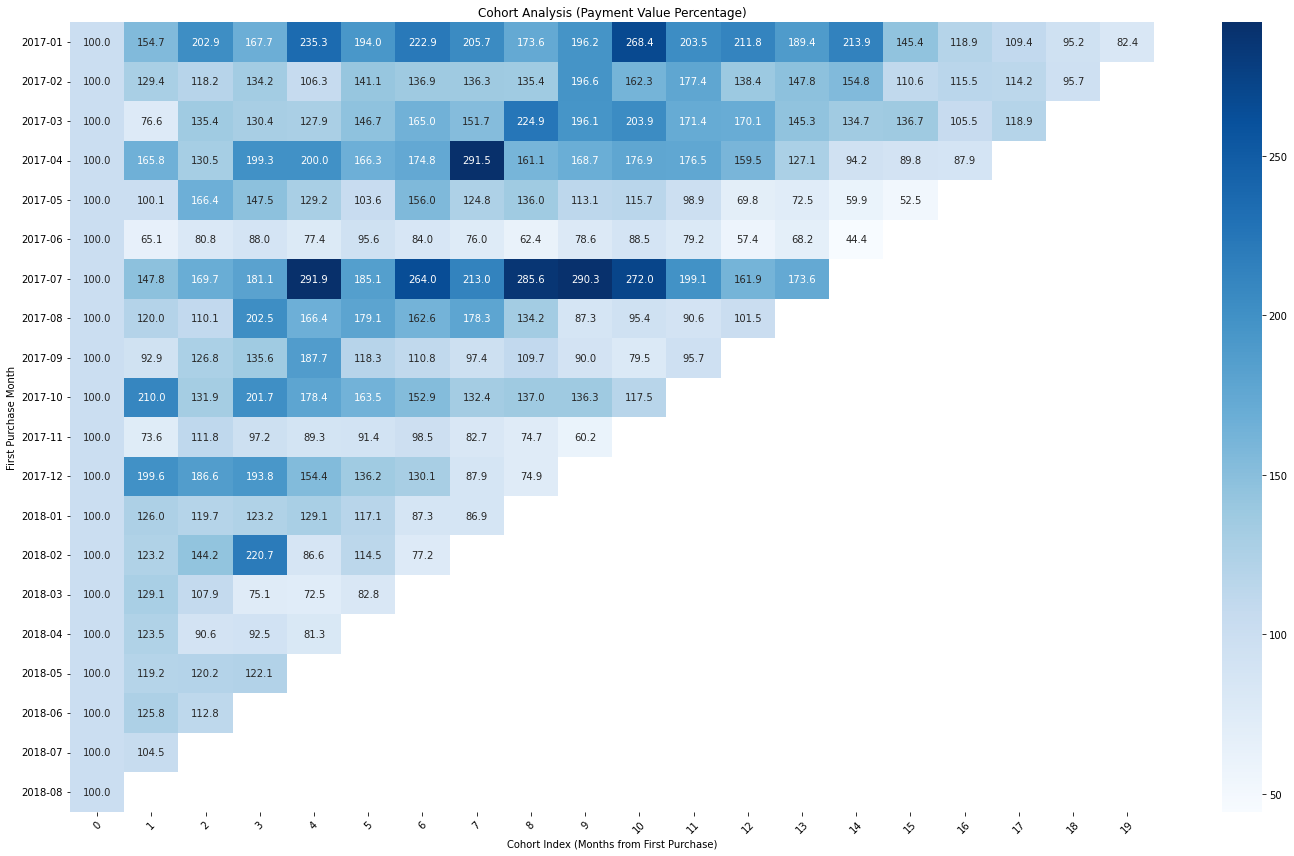

In [120]:
# Salin DataFrame
df_cohort = df.copy()

# Konversi kolom timestamp ke datetime
df_cohort['order_purchase_timestamp'] = pd.to_datetime(df_cohort['order_purchase_timestamp'])

# Menghapus entri dengan order_purchase_timestamp tahun 2016
df_cohort = df_cohort[df_cohort['order_purchase_timestamp'].dt.year != 2016]

# Buat kolom cohort_month
df_cohort['cohort_month'] = df_cohort['order_purchase_timestamp'].dt.to_period('M')

# Menentukan bulan pertama untuk setiap seller
cohort_labels = df_cohort.groupby('seller_id')['cohort_month'].min().reset_index()
cohort_labels.columns = ['seller_id', 'first_purchase']

# Gabungkan dengan DataFrame original
df_cohort = df_cohort.merge(cohort_labels, on='seller_id')

# Menghitung umur kohort
df_cohort['cohort_index'] = (df_cohort['cohort_month'].dt.year - df_cohort['first_purchase'].dt.year) * 12 + (df_cohort['cohort_month'].dt.month - df_cohort['first_purchase'].dt.month)

# Menghitung IQR untuk payment_value
Q1 = df_cohort['payment_value'].quantile(0.25)
Q3 = df_cohort['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Dropping outlier
df_cohort = df_cohort[(df_cohort['payment_value'] >= lower_bound) & (df_cohort['payment_value'] <= upper_bound)]

# Hitung cohort data
cohort_data = df_cohort.groupby(['first_purchase', 'cohort_index'])['payment_value'].sum().unstack(fill_value=np.nan)

# Hitung persentase
cohort_data_percentage = cohort_data.div(cohort_data.iloc[:, 0], axis=0) * 100

# Visualisasi dengan heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(cohort_data_percentage, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title('Cohort Analysis (Payment Value Percentage)')
plt.xlabel('Cohort Index (Months from First Purchase)')
plt.ylabel('First Purchase Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
tools.display_dataframe_to_user(name="Cohort Sales Volume", dataframe=cohort_pivot)
tools.display_dataframe_to_user(name="Cohort Sales Growth Rate", dataframe=cohort_growth_rate)

NameError: name 'tools' is not defined

### **Monthly Total Revenue**

In [132]:
data_revenue = df.copy()

data_revenue['month_purchase'] = data_revenue['order_purchase_timestamp'].dt.to_period('M')
data_revenue['year_purchase'] = data_revenue['order_purchase_timestamp'].dt.to_period('Y')

display(data_revenue.head())

data_avg_revenue_month = data_revenue.groupby('month_purchase').agg(
    avg_sales = ('price', 'mean'),
    order_count = ('order_id', 'count')
).reset_index()

# 2017 - 2018
data_monthly_revenue = data_revenue.groupby('month_purchase').agg(
    sales = ('price', 'sum'),
    order_count = ('order_id', 'count')
).reset_index()

data_avg_revenue_year = data_revenue.groupby('year_purchase')[['price']].mean().reset_index()

,customer_id,customer_unique_id,order_id,seller_id,product_cat_name,order_item_count,shipping_limit_date,price,freight_value,payment_value,payment_type,payment_installments,payment_sequential,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,month_purchase,year_purchase
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,1,2017-05-03,239.90,19.93,259.83,credit_card,3,1,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,4,2017-05-13,2017-05-15 11:34:13,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,2017-04,2017
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,furniture_decor,1,2018-01-18,199.00,17.87,216.87,credit_card,5,1,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5,2018-01-23,2018-01-23 16:06:31,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,2018-01,2018
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,perfumery,1,2018-08-15,12.99,12.79,25.78,credit_card,2,1,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,4,2018-08-15,2018-08-15 16:39:01,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,2018-08,2018
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,garden_tools,1,2017-02-13,199.90,18.14,218.04,credit_card,3,1,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,5,2017-03-02,2017-03-03 10:54:59,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,2017-02,2017
5,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,housewares,1,2017-05-23,21.90,12.69,34.59,boleto,1,1,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,4,2017-05-23,2017-05-24 19:00:09,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,2017-05,2017


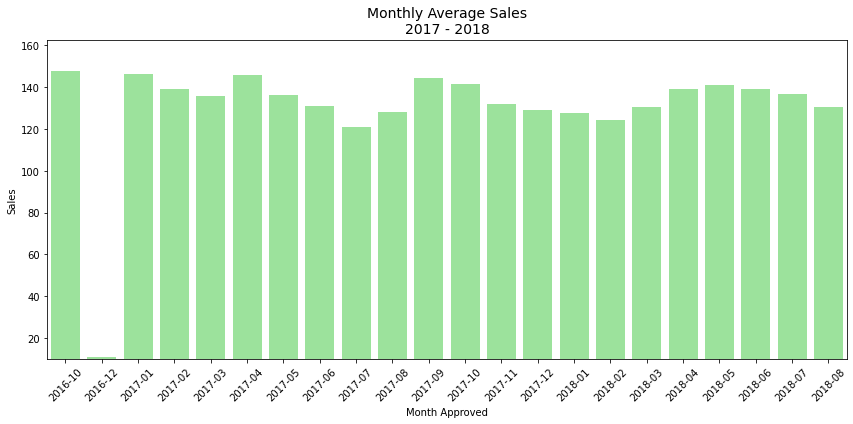

In [133]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'month_purchase', y = 'avg_sales', 
            data = data_avg_revenue_month, color = 'lightgreen')

plt.title('Monthly Average Sales\n2017 - 2018',
          fontsize = '14')
plt.xlabel('Month Approved')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(data_avg_revenue_month['avg_sales'].min() * 0.9, data_avg_revenue_month['avg_sales'].max() * 1.1)
plt.ylabel('Sales')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

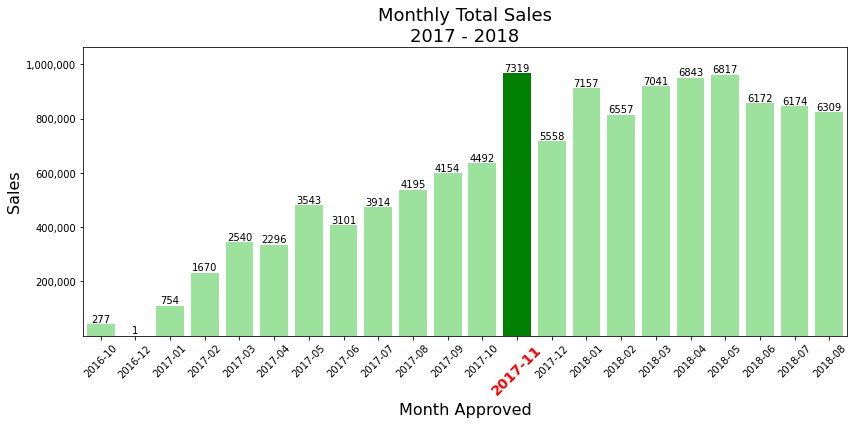

In [135]:
plt.figure(figsize = (12, 6))

sns.barplot(x = 'month_purchase', y = 'sales', 
            data = data_monthly_revenue, color = 'lightgreen')

plt.title('Monthly Total Sales\n2017 - 2018', 
          fontsize = 18)
plt.xlabel('Month Approved', fontsize = 16)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(data_monthly_revenue['sales'].min() * 0.9, data_monthly_revenue['sales'].max() * 1.1)
plt.ylabel('Sales', fontsize = 16)
plt.xticks(rotation = 45)

ax = plt.gca()  
for tick in ax.get_xticklabels():
    if tick.get_text() == '2017-11':  
        tick.set_color('red')
        tick.set_fontweight('bold')
        tick.set_fontsize(14)

for index, bar in enumerate(ax.patches):
    if data_monthly_revenue['month_purchase'][index] == pd.Period('2017-11'):
        bar.set_facecolor('green')
        
for index, bar in enumerate(ax.patches):
    yval = bar.get_height()
    order_count = data_monthly_revenue['order_count'][index]
    plt.text(bar.get_x() + bar.get_width()/2, yval, 
             f'{order_count}', 
             ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
plt.show()

### **Weekday vs Weekend Sales**

In [49]:
df_day_end_sales = df.copy()

df_day_end_sales = df_day_end_sales[['order_id', 'order_item_count', 'price', 'payment_value',
                                     'order_purchase_timestamp']]
df_day_end_sales['day'] = df_day_end_sales.order_purchase_timestamp.dt.day_name()

# Classifying weektype
def classify_weektype(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

df_day_end_sales['weektype'] = df_day_end_sales.day.apply(classify_weektype)

display(df_day_end_sales.sample(5))
display(df_day_end_sales.info())

,order_id,order_item_count,price,payment_value,order_purchase_timestamp,day,weektype
12083,1f057fd42c4cc8c1711e2b9ae3719afe,1,32.50,45.29,2018-03-14 12:52:51,Wednesday,Weekday
81996,d242fb417c35b6973c20dfab0514f8a1,1,252.00,303.63,2018-01-05 15:04:07,Friday,Weekday
51008,833aeeba583417aa644a7c311e6b5bd8,1,2288.00,2384.50,2018-02-27 19:14:20,Tuesday,Weekday
53603,8a1f37725eebf19474556726f014f72d,1,14.14,31.74,2017-05-08 17:30:15,Monday,Weekday
66619,aba40f06818d2d5bd3590b335352fd3f,1,22.90,30.77,2018-04-06 17:05:49,Friday,Weekday


<class 'pandas.core.frame.DataFrame'>
Index: 96884 entries, 1 to 99693
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96884 non-null  object        
 1   order_item_count          96884 non-null  int64         
 2   price                     96884 non-null  float64       
 3   payment_value             96884 non-null  float64       
 4   order_purchase_timestamp  96884 non-null  datetime64[ns]
 5   day                       96884 non-null  object        
 6   weektype                  96884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.9+ MB


None

In [50]:
df_weektype = df_day_end_sales.groupby('weektype').agg({'order_id' : 'nunique',
                                                        'order_item_count' : 'sum',
                                                        'payment_value': ['sum', 'mean']}).round(2)
df_weektype.columns = ['count', 'items_count', 'total_revenue', 'avg_revenue']
df_weektype

,count,items_count,total_revenue,avg_revenue
weektype,,,,
Weekday,71728,84092,11702031.92,156.89
Weekend,21396,24662,3469832.46,155.63


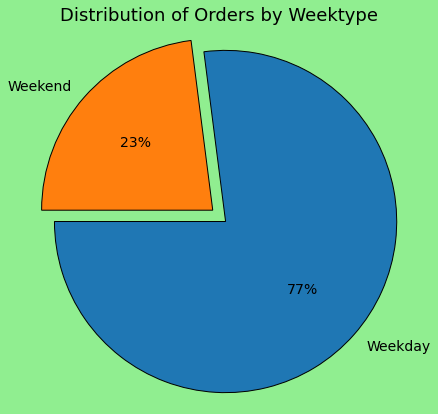

In [51]:
# Pie Chart

df_weektype_dict = df_weektype['count'].to_dict()

labels = df_weektype_dict.keys()
sizes = df_weektype_dict.values()

plt.figure(figsize = (7, 7), facecolor = 'lightgreen')
plt.pie(sizes, labels = labels, 
        autopct = '%1.0f%%', 
        startangle = 180,
        textprops = {'fontsize': 14},
        explode = (0, 0.1),
        wedgeprops = {'edgecolor': 'black'})

plt.title('Distribution of Orders by Weektype', fontsize = 18)
plt.axis('equal')  
plt.show()

### **Review Score vs Average Shipping**

In [9]:
df_shipping_score = df.copy()
df_shipping_score = df_shipping_score[['order_id', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score']]
df_shipping_score['shipment_time'] = abs(df_shipping_score['order_delivered_carrier_date'] - df_shipping_score['order_delivered_customer_date'])

df_shipping_score = df_shipping_score.groupby('review_score').agg(
    avg_shipment_time=('shipment_time', lambda x: x.mean().days), 
    order_count=('order_id', 'count') 
)

display(df_shipping_score)

,avg_shipment_time,order_count
review_score,,
1,16,9816
2,12,3125
3,10,8107
4,9,19040
5,7,56796


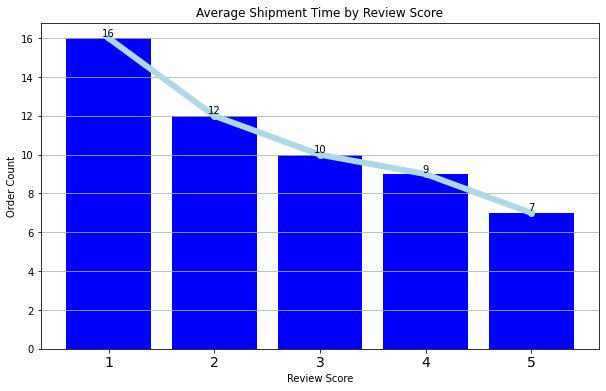

In [10]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_shipping_score.index, df_shipping_score['avg_shipment_time'], 
               label = 'Shipment Time', color = 'blue')

plt.plot(df_shipping_score.index, df_shipping_score['avg_shipment_time'], 
         color = 'lightblue', marker = 'o', label = 'Avg Shipment Time (days)',
         linewidth = 6)

plt.title('Average Shipment Time by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Order Count')
plt.xticks(fontsize = 14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha = 'center', va = 'bottom', fontsize = 10)

plt.grid(axis = 'y')

plt.show()

### **Review Score vs Average Order Approved**

In [11]:
df.head()

,customer_id,customer_unique_id,order_id,seller_id,product_cat_name,order_item_count,shipping_limit_date,price,freight_value,payment_value,payment_type,payment_installments,payment_sequential,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,1,2017-05-03,239.90,19.93,259.83,credit_card,3,1,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,4,2017-05-13,2017-05-15 11:34:13,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,furniture_decor,1,2018-01-18,199.00,17.87,216.87,credit_card,5,1,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5,2018-01-23,2018-01-23 16:06:31,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,perfumery,1,2018-08-15,12.99,12.79,25.78,credit_card,2,1,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,4,2018-08-15,2018-08-15 16:39:01,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,garden_tools,1,2017-02-13,199.90,18.14,218.04,credit_card,3,1,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,5,2017-03-02,2017-03-03 10:54:59,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438
5,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,housewares,1,2017-05-23,21.90,12.69,34.59,boleto,1,1,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,4,2017-05-23,2017-05-24 19:00:09,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330


In [12]:
df_approved_score = df.copy()
df_approved_score.order_purchase_timestamp = df_approved_score.order_purchase_timestamp
df_approved_score.order_approved_at = df_approved_score.order_approved_at

df_approved_score = df_approved_score[['order_id', 'order_purchase_timestamp', 'order_approved_at', 'review_score']]
df_approved_score['approved_time'] = abs(df_approved_score['order_purchase_timestamp'] - df_approved_score['order_approved_at'])

df_approved_score.approved_time = df_approved_score.approved_time.dt.total_seconds() / (24 * 3600)

# df_approved_score.approved_time.max()

df_approved_score = df_approved_score.groupby('review_score').agg(
    avg_approved_time = ('approved_time', 'max'), 
    order_count=('order_id', 'count') 
)

display(df_approved_score)

,avg_approved_time,order_count
review_score,,
1,30.768704,9816
2,10.687812,3125
3,30.893484,8107
4,16.842870,19040
5,12.479907,56796


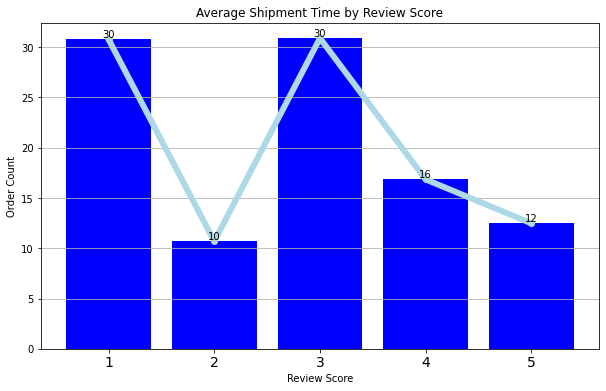

In [13]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_approved_score.index, df_approved_score['avg_approved_time'], 
               label = 'Shipment Time', color = 'blue')

plt.plot(df_approved_score.index, df_approved_score['avg_approved_time'], 
         color = 'lightblue', marker = 'o', label = 'Avg Approved Time (days)',
         linewidth = 6)

plt.title('Average Shipment Time by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Order Count')
plt.xticks(fontsize = 14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha = 'center', va = 'bottom', fontsize = 10)

plt.grid(axis = 'y')

plt.show()

### **Payment Type**

In [14]:
df.payment_type.value_counts()

payment_type
credit_card    73022
boleto         18802
voucher         3610
debit_card      1450
Name: count, dtype: int64

In [15]:
df.head(2)

,customer_id,customer_unique_id,order_id,seller_id,product_cat_name,order_item_count,shipping_limit_date,price,freight_value,payment_value,payment_type,payment_installments,payment_sequential,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,1,2017-05-03,239.9,19.93,259.83,credit_card,3,1,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,4,2017-05-13,2017-05-15 11:34:13,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,furniture_decor,1,2018-01-18,199.0,17.87,216.87,credit_card,5,1,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5,2018-01-23,2018-01-23 16:06:31,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556


In [16]:
df_payment = df.copy()
df_payment = df_payment.groupby('payment_type')['order_id'].count()
df_payment = df_payment.to_dict()

df_payment

{'boleto': 18802, 'credit_card': 73022, 'debit_card': 1450, 'voucher': 3610}

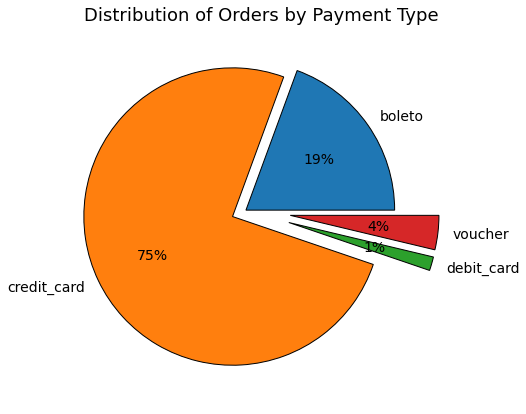

In [17]:
# Pie Chart

labels = df_payment.keys()
sizes = df_payment.values()

plt.figure(figsize = (7, 7), facecolor = 'white')
plt.pie(sizes, labels = labels, 
        autopct = '%1.0f%%', 
        startangle = 0,
        textprops = {'fontsize': 14},
        explode = (0, 0.1, 0.3, 0.3),
        wedgeprops = {'edgecolor': 'black'})

plt.title('Distribution of Orders by Payment Type', fontsize = 18)
plt.axis('equal')  
plt.show()

#### Freight Analysis

Aims to know the percentage postage discount on shipping payment that can still be profitable for the company

In [18]:
df.head()

,customer_id,customer_unique_id,order_id,seller_id,product_cat_name,order_item_count,shipping_limit_date,price,freight_value,payment_value,payment_type,payment_installments,payment_sequential,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,1,2017-05-03,239.90,19.93,259.83,credit_card,3,1,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,4,2017-05-13,2017-05-15 11:34:13,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,furniture_decor,1,2018-01-18,199.00,17.87,216.87,credit_card,5,1,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5,2018-01-23,2018-01-23 16:06:31,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,perfumery,1,2018-08-15,12.99,12.79,25.78,credit_card,2,1,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,4,2018-08-15,2018-08-15 16:39:01,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,garden_tools,1,2017-02-13,199.90,18.14,218.04,credit_card,3,1,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,5,2017-03-02,2017-03-03 10:54:59,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438
5,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,housewares,1,2017-05-23,21.90,12.69,34.59,boleto,1,1,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,4,2017-05-23,2017-05-24 19:00:09,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330


In [19]:
freight = df.copy()
freight['order_purchase_month'] = freight.order_purchase_timestamp.dt.to_period('M')

In [20]:
df_freight_monthly = df_freight.groupby(['order_approved_at']).agg({'sales' : ['count', 'sum'],
                                                                    'freight_value' : 'sum',
                                                                   'sales_freight_payed_100' : 'sum',
                                                                   'sales_freight_payed_50' : 'sum'})
df_freight_monthly.columns = ['order_count', 'sales', 'shipping_value', 'sales_shipping_payed_100', 'sales_shipping_payed_50']

# Make a Column to Represents Sales after Freight/Shipping Payed
df_freight_monthly['%profit_100'] = round(df_freight_monthly.sales_shipping_payed_100/df_freight_monthly.sales * 100, 2)
df_freight_monthly['%profit_50'] = round(df_freight_monthly.sales_shipping_payed_50/df_freight_monthly.sales * 100, 2)

avg_profit_free_shipment_100 = round(df_freight_monthly.sales_shipping_payed_100.sum()/df_freight_monthly.sales.sum() * 100, 2)
avg_profit_free_shipment_50 = round(df_freight_monthly.sales_shipping_payed_50.sum()/df_freight_monthly.sales.sum() * 100, 2)
print(f'Average All Time Profit If Including Free Shipment (100%): {avg_profit_free_shipment_100} %')
print(f'Average All Time Profit If Including Free Shipment (50%): {avg_profit_free_shipment_50} %')
display(df_freight_monthly)

df_freight_monthly.index = df_freight_monthly.index.astype(str)
plt.figure(figsize = (10, 8))
plt.plot(df_freight_monthly['%profit_100'], marker = 'o', label = 'shipment reimburse 100%')
plt.plot(df_freight_monthly['%profit_50'], marker = 'o', label = 'shipment reimburse 50%')
plt.title('Monthly Seller Sales (Shipping Reimbursed) by 100%')
plt.xlabel('Month')
plt.ylabel('Profit (%)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'df_freight' is not defined

#### *** Sales and Reviews Heatmap

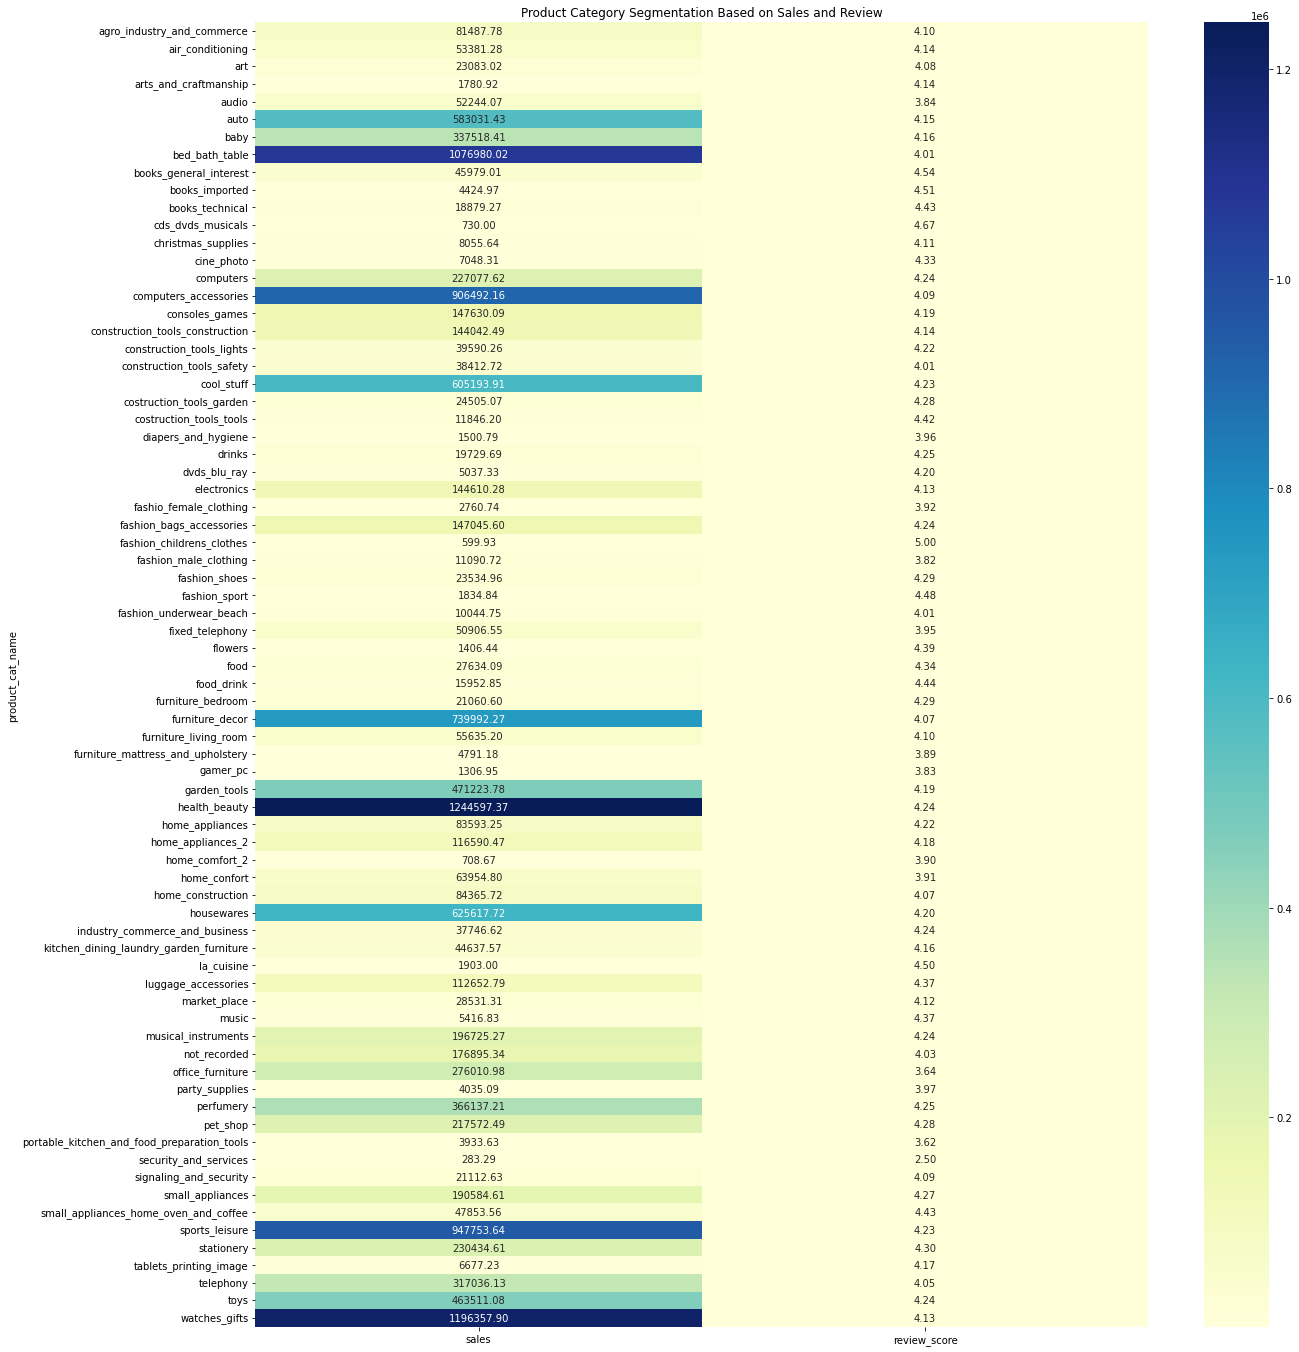

In [19]:
category_sales = df.groupby('product_cat_name')['sales'].sum().reset_index()
category_reviews = df.groupby('product_cat_name')['review_score'].mean().reset_index()

category_data = pd.merge(category_sales, category_reviews, on='product_cat_name')

# Heatmap untuk segmentasi kategori
category_data.set_index('product_cat_name', inplace = True)
plt.figure(figsize = (20, 24))
sns.heatmap(category_data, annot = True, cmap = 'YlGnBu', fmt = '.2f')
# plt.title('Segmentasi Kategori Produk berdasarkan Penjualan dan Review')
plt.title('Product Category Segmentation Based on Sales and Review')
plt.show()

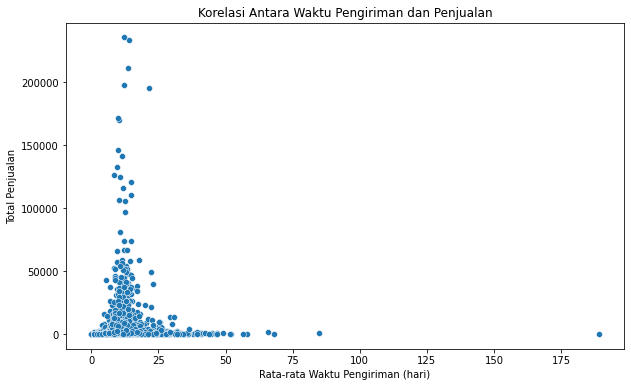

In [37]:
df_dlv_time = df.copy()

df_dlv_time['delivery_time'] = (df_dlv_time['order_delivered_customer_date'] - df_dlv_time['order_purchase_timestamp']).dt.days

seller_delivery_time = df_dlv_time.groupby('seller_id')['delivery_time'].mean().reset_index()
seller_sales = df_dlv_time.groupby('seller_id')['sales'].sum().reset_index()

delivery_sales = pd.merge(seller_delivery_time, seller_sales, on='seller_id')

# Plot delivery time vs sales
plt.figure(figsize = (10,6))
sns.scatterplot(x='delivery_time', y='sales', data = delivery_sales)
plt.title('Korelasi Antara Waktu Pengiriman dan Penjualan')
plt.xlabel('Rata-rata Waktu Pengiriman (hari)')
plt.ylabel('Total Penjualan')
plt.show()

In [217]:
df['order_delivered_customer_date']
# df['order_purchase_timestamp']

1       2017-04-26 10:53:06
2       2018-01-14 14:33:31
3       2018-08-08 10:00:35
4       2017-02-04 13:57:51
5       2017-05-15 21:42:34
                ...        
96455   2018-04-23 13:57:06
96456   2018-07-14 10:26:46
96457   2017-10-23 17:07:56
96458   2017-08-14 23:02:59
96459   2018-06-09 17:00:18
Name: order_purchase_timestamp, Length: 93100, dtype: datetime64[ns]

#### *** Seller Growth Analysis

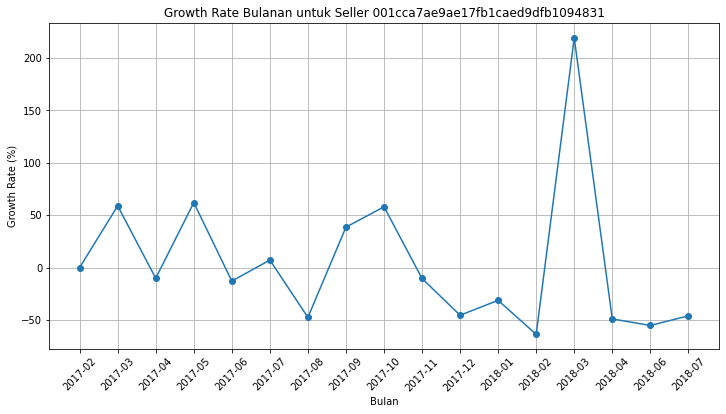

In [71]:
df['month_order'] = df['order_purchase_timestamp'].dt.to_period('M')

seller_monthly_sales = df.groupby(['seller_id', 'month_order'])['sales'].sum().reset_index()

seller_monthly_sales = seller_monthly_sales.sort_values(by = ['seller_id', 'month_order'])
seller_monthly_sales['monthly_growth'] = seller_monthly_sales.groupby('seller_id')['sales'].pct_change() * 100
seller_monthly_sales['seller_count'] = seller_monthly_sales.groupby('seller_id')['seller_id'].transform('count')
seller_monthly_sales.monthly_growth.fillna(0, inplace = True)
# seller_monthly_sales.monthly_growth.fillna(1e-6, inplace = True)

first_last_sales = seller_monthly_sales.groupby('seller_id').agg(
    first_month = ('month_order', 'first'),
    last_month = ('month_order', 'last'),
    first_sales = ('sales', 'first'),
    last_sales = ('sales', 'last')
).reset_index()

first_last_sales['first_sales'] = first_last_sales['first_sales'].replace(0, 1e-6)

first_last_sales['total_growth'] = ((first_last_sales['last_sales'] - first_last_sales['first_sales']) / first_last_sales['first_sales']) * 100

# Example
seller_id = '001cca7ae9ae17fb1caed9dfb1094831'  
seller_growth = seller_monthly_sales[seller_monthly_sales['seller_id'] == seller_id]

plt.figure(figsize = (12, 6))
plt.plot(seller_growth['month_order'].astype(str), seller_growth['monthly_growth'], marker = 'o')
plt.title(f'Growth Rate Bulanan untuk Seller {seller_id}')
plt.xlabel('Bulan')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [58]:
seller_monthly_sales

,seller_id,month_order,sales,monthly_growth,seller_count
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09,895.0,0.000000,2
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,1790.0,100.000000,2
2,001cca7ae9ae17fb1caed9dfb1094831,2017-02,1098.9,0.000000,17
3,001cca7ae9ae17fb1caed9dfb1094831,2017-03,1746.6,58.940759,17
4,001cca7ae9ae17fb1caed9dfb1094831,2017-04,1568.3,-10.208405,17
...,...,...,...,...,...
15376,fffd5413c0700ac820c7069d66d98c89,2018-06,248.3,-79.855590,14
15377,fffd5413c0700ac820c7069d66d98c89,2018-07,286.0,15.183246,14
15378,fffd5413c0700ac820c7069d66d98c89,2018-08,485.4,69.720280,14
15379,ffff564a4f9085cd26170f4732393726,2016-10,120.5,0.000000,2


In [48]:
seller_avg_growth = seller_monthly_sales.groupby('seller_id').agg({'monthly_growth' : ['mean', 'count']}).reset_index().round(2)

seller_avg_growth.columns = ['seller_id', 'avg_growth_rate', 'months']
seller_avg_growth['avg_growth_rate'].fillna(0, inplace = True)
seller_avg_growth.sort_values(by = 'months', ascending = False, inplace = True)

display(seller_avg_growth)

seller_avg_growth_grp = seller_avg_growth.groupby('months').agg({'avg_growth_rate' : ['mean', 'count']}).round(2)
seller_avg_growth_grp.columns = ['avg_growth_rate', 'seller_count']
display(seller_avg_growth_grp)

,seller_id,avg_growth_rate,months
749,440dd6ab244315c632130ecfb63827b1,43.31,21
228,1554a68530182680ad5c8b042c3ab563,51.70,21
1955,b2ba3715d723d245138f291a6fe42594,52.66,21
1810,a3a38f4affed601eb87a97788c949667,63.19,21
1093,620c87c171fb2a6dd6e8bb4dec959fc6,33.87,21
...,...,...,...
933,535bf14f36346c7f59d87cece104d70c,0.00,1
2358,d598f929fc44e1e38678e7f47250ec04,0.00,1
930,533d46c1b06970e99f09523a61df4972,0.00,1
929,53336f97ddbe53e2a617d07b17447b95,0.00,1


,avg_growth_rate,seller_count
months,,
1,0.00,661
2,48.25,431
3,62.72,302
4,83.54,244
5,74.74,212
6,108.44,140
7,110.42,111
8,72.08,93
9,126.54,74


In [171]:
seller_avg_growth_grp[seller_avg_growth_grp.avg_growth_rate < 50]

,avg_growth_rate,seller_count
months,,
1,0.00,661
2,48.25,431


In [52]:
seller_1_month = seller_avg_growth[seller_avg_growth.months == 1]
seller_3_month = seller_avg_growth[(2 <= seller_avg_growth.months) & (seller_avg_growth.months <= 3)]
seller_6_month = seller_avg_growth[(4 <= seller_avg_growth.months) & (seller_avg_growth.months <= 6)]
seller_9_month = seller_avg_growth[(7 <= seller_avg_growth.months) & (seller_avg_growth.months <= 9)]
seller_12_month = seller_avg_growth[(10 <= seller_avg_growth.months) & (seller_avg_growth.months <= 12)]
seller_12_up_month = seller_avg_growth[seller_avg_growth.months > 12]

print(f'''Seller Count Based on Timelength & Avg Seller Sales:
1 Month Seller    : {len(seller_1_month)}, average : {seller_1_month.avg_growth_rate.mean().round(2)}
3 Month Seller    : {len(seller_3_month)}, average : {seller_3_month.avg_growth_rate.mean().round(2)}
6 Month Seller    : {len(seller_6_month)}, average : {seller_6_month.avg_growth_rate.mean().round(2)}
9 Month Seller    : {len(seller_9_month)}, average : {seller_9_month.avg_growth_rate.mean().round(2)}
12 Month Seller   : {len(seller_12_month)}, average : {seller_12_month.avg_growth_rate.mean().round(2)}
> 12 Month Seller : {len(seller_12_up_month)}, average : {seller_12_up_month.avg_growth_rate.mean().round(2)}''')

Seller Count Based on Timelength & Avg Seller Sales:
1 Month Seller    : 661, average : 0.0
3 Month Seller    : 733, average : 54.21
6 Month Seller    : 596, average : 86.26
9 Month Seller    : 278, average : 101.88
12 Month Seller   : 219, average : 91.29
> 12 Month Seller : 339, average : 87.64


In [121]:
seller_6_month.sort_values(by = ['seller_id', 'months'])

,seller_id,avg_growth_rate,months
9,00fc707aaaad2d31347cf883cd2dfe10,583.02,6
16,014d9a685fd57276679edd00e07089e5,43.60,4
18,01bcc9d254a0143f0ce9791b960b2a47,115.89,5
19,01c97ebb5cdac52891c0ed1c37ba0012,71.29,6
21,01ed254b9ff8407dfb9d99ba1e17d923,-29.60,4
...,...,...,...
2807,fec6275253471ace26d209bbaa64cd0f,16.67,5
2815,ff4e2d38692ce827b1a4f4b8196e680d,15.48,6
2816,ff4ea69c2a729e83e63c7579e4ef8170,69.70,4
2819,ffa6adafb71b807dc13159e26431354c,28.28,5


In [56]:
seller_monthly_sales[seller_monthly_sales.seller_id == 'a3dd39f583bc80bd8c5901c95878921e']

,seller_id,month_order,sales,monthly_growth
9948,a3dd39f583bc80bd8c5901c95878921e,2017-08,53.89,0.000000
9949,a3dd39f583bc80bd8c5901c95878921e,2017-09,52.00,-3.507144
9950,a3dd39f583bc80bd8c5901c95878921e,2017-10,2631.16,4959.923077
9951,a3dd39f583bc80bd8c5901c95878921e,2017-11,2076.90,-21.065234
9952,a3dd39f583bc80bd8c5901c95878921e,2017-12,359.50,-82.690548
9953,a3dd39f583bc80bd8c5901c95878921e,2018-02,149.00,-58.553547
9954,a3dd39f583bc80bd8c5901c95878921e,2018-03,49.90,-66.510067
9955,a3dd39f583bc80bd8c5901c95878921e,2018-04,149.70,200.000000


### **Monthly Sales**

In [21]:
df_sales = df.copy()
df['order_purchase_month_name'] = df_sales.order_purchase_timestamp.dt.month_name()

monthly_sales = df_sales.groupby('order_purchase_month_name')[['freight_value', 'price']].sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

month_type = pd.CategoricalDtype(categories = month_order, ordered=True)

monthly_sales.index = monthly_sales.index.astype(month_type)
monthly_sales = monthly_sales.sort_index()

plt.figure(figsize = (20, 8))
bars = plt.bar(monthly_sales.index, monthly_sales['price'], label = 'Bar - Sales')
plt.plot(monthly_sales.index, monthly_sales['price'], color = 'red', 
         marker = 'o', label = 'Line - Sales', linewidth = 6)

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(fontsize = 14)

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset = False))
plt.gca().ticklabel_format(style = 'plain', axis = 'y')  

plt.grid(axis = 'y')

for bar in bars:
    yval  =  bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, 
             f'Rp. {yval:,.2f}', 
             ha = 'center', va = 'top', fontsize = 10)

plt.show()

KeyError: 'order_purchase_month_name'

### **Top 10 Product Sales**

In [22]:
df_product_sales = df.groupby('product_cat_name').agg(
    order_count = ('order_id', 'count'),
    total_revenue = ('payment_value', 'sum')
)

df_product_sales.sort_values(by = ['order_count'],
                             ascending = False,
                             inplace = True)

df_product_sales = df_product_sales.head(10)
df_product_sales[['order_count', 'total_revenue']] = df_product_sales[['order_count', 'total_revenue']].astype(int)

df_product_sales = df_product_sales.sort_values(by = 'order_count')

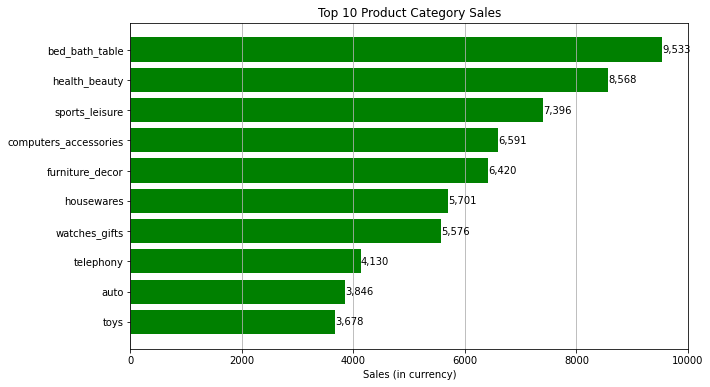

In [23]:
plt.figure(figsize = (10, 6))
bars = plt.barh(df_product_sales.index, 
                df_product_sales.order_count,
                color = 'g')

plt.title('Top 10 Product Category Sales')
plt.xlabel('Sales (in currency)')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va = 'center', ha = 'left', fontsize = 10)

plt.grid(axis='x')

plt.show()

### **Top 10 City Sales (Order Count)**

In [24]:
df_city_sales = df.groupby('customer_city').agg(
    order_count = ('order_id', 'count'),
    total_revenue = ('payment_value', 'sum'),
    avg_revenue = ('payment_value', 'mean')
)

df_city_sales = df_city_sales.sort_values(by = ['order_count', 'total_revenue'],
                                          ascending = False).iloc[:10]

df_city_sales = df_city_sales.sort_values(by = 'order_count')

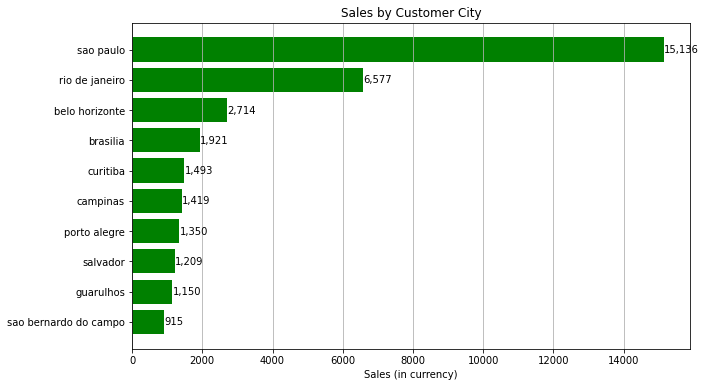

In [25]:
plt.figure(figsize = (10, 6))
bars = plt.barh(df_city_sales.index, 
                df_city_sales.order_count, 
                color = 'g')

plt.title('Sales by Customer City')
plt.xlabel('Sales (in currency)')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va = 'center', ha = 'left', fontsize = 10)

plt.grid(axis='x')

plt.show()

### **Year Order Sales Count**

In [26]:
df_order_sales = df.copy()

df_order_sales['order_purchase_month'] = df_order_sales['order_purchase_timestamp'].dt.to_period('M')

df_monthly_order_sales = df_order_sales.groupby('order_id').agg(
    revenue = ('payment_value', 'first'),
    order_month = ('order_purchase_month', 'first')
).reset_index()

df_monthly_order_sales = df_order_sales.groupby('order_purchase_month').agg(
    revenue = ('payment_value', 'sum'),
    orders = ('order_id', 'nunique')
).reset_index()

df_monthly_order_sales['order_purchase_year'] = df_monthly_order_sales['order_purchase_month'].dt.year

df_yearly_order_sales = df_monthly_order_sales.groupby('order_purchase_year').agg(
    orders = ('orders', 'sum'),
    revenue = ('revenue', 'mean'),
).round(0)

df_yearly_order_sales.index = df_yearly_order_sales.index.astype(str)

display(df_yearly_order_sales.head())
display(df_yearly_order_sales.info())

,orders,revenue
order_purchase_year,,
2016,268,23836.0
2017,41777,562437.0
2018,51079,1046868.0


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2016 to 2018
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   orders   3 non-null      int64  
 1   revenue  3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 72.0+ bytes


None

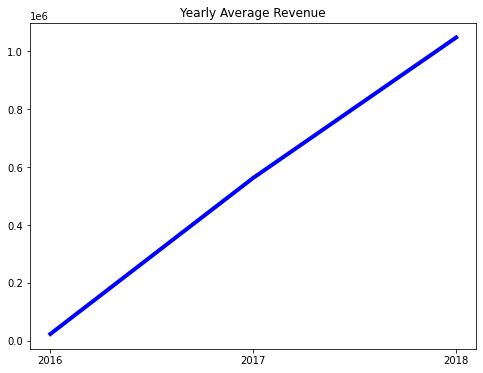

In [27]:
# Line Plot

plt.figure(figsize = (8, 6))
plt.plot(df_yearly_order_sales.revenue, linewidth = 4, color = 'blue')
plt.title('Yearly Average Revenue')
plt.show()

### **Sales Based on State**

In [80]:
data_revenue = df.copy()

data_revenue['month_purchase'] = data_revenue['order_purchase_timestamp'].dt.to_period('M')
data_revenue['year_purchase'] = data_revenue['order_purchase_timestamp'].dt.to_period('Y')

data_avg_revenue_month = data_revenue.groupby('month_purchase').agg(
    avg_sales = ('payment_value', 'mean'),
    order_count = ('order_id', 'count')
).reset_index()

In [81]:
df_state = df.groupby('customer_state').agg(
    cust_count = ('customer_unique_id', 'nunique'),
    order_count = ('order_id', 'nunique'),
    total_revenue = ('payment_value', 'sum')
).reset_index()

df_state.head()

,customer_state,cust_count,order_count,total_revenue
0,AC,73,77,19079.92
1,AL,375,385,91932.76
2,AM,137,142,26857.35
3,AP,64,65,15941.42
4,BA,3027,3115,570290.43


In [82]:
top_ord_cust = df_state.copy()
top_ord_cust = top_ord_cust.sort_values(by = ['cust_count', 'order_count'],
                                        ascending = False).iloc[:10].reset_index(
                                            drop = True
                                        )
top_ord_cust

,customer_state,cust_count,order_count,total_revenue
0,SP,37942,39222,5717531.43
1,RJ,11487,11895,2029580.25
2,MG,10663,11000,1792715.53
3,RS,5010,5176,860838.34
4,PR,4616,4757,769719.00
5,SC,3320,3410,582128.57
6,BA,3027,3115,570290.43
7,ES,1868,1925,302936.54
8,GO,1830,1889,328620.98
9,DF,1809,1865,316908.00


#### Top 10 State Highest Customer & Order Count by State

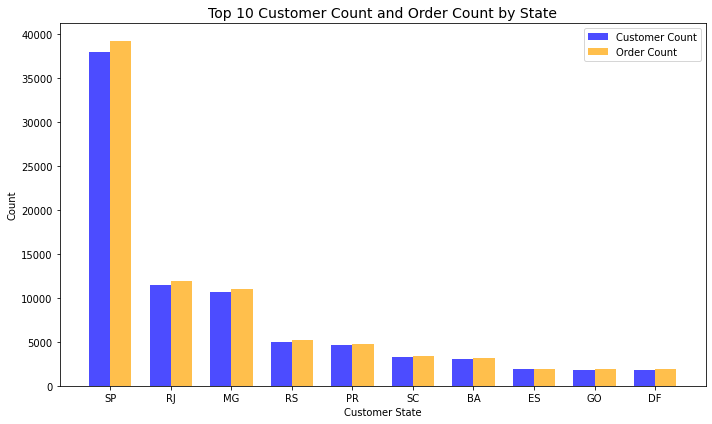

In [31]:
plt.figure(figsize = (10, 6))

bar_width = 0.35
indices = np.arange(len(top_ord_cust['customer_state']))

plt.bar(indices, top_ord_cust['cust_count'], 
        width = bar_width, 
        label = 'Customer Count', 
        color = 'blue', alpha = 0.7)

plt.bar(indices + bar_width, 
        top_ord_cust['order_count'], 
        width = bar_width, 
        label = 'Order Count', 
        color = 'orange', 
        alpha = 0.7)

plt.title('Top 10 Customer Count and Order Count by State', fontsize = 14)
plt.xlabel('Customer State')
plt.ylabel('Count')

plt.xticks(indices + bar_width / 2, top_ord_cust['customer_state'])

plt.legend()

plt.tight_layout()
plt.show()

#### Top 10 Highest State Revenue

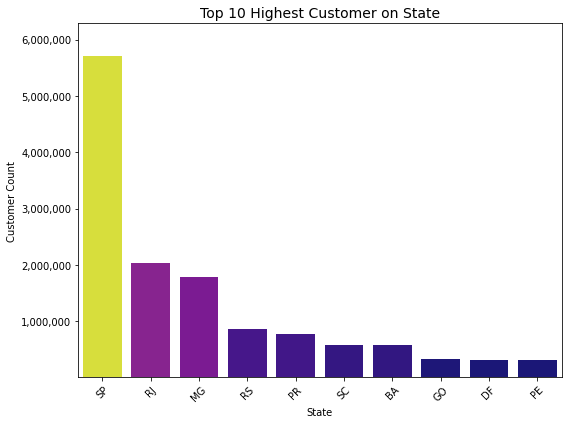

In [85]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'customer_state', y = 'total_revenue',
            hue = 'total_revenue',
            data = df_state.sort_values(by = 'total_revenue', 
                                        ascending = False).iloc[:10],
            palette = 'plasma',
            legend = False)

plt.title('Top 10 Highest Customer on State', 
          fontsize = '14')
plt.xlabel('State')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(df_state['total_revenue'].min() * 0.9, df_state['total_revenue'].max() * 1.1)
plt.ylabel('Customer Count')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### **Order & Revenue Trend**

In [33]:
order_revenue_trend = df.copy()
order_revenue_trend.order_purchase_timestamp = order_revenue_trend.order_purchase_timestamp.dt.date
order_revenue_trend.head()

,customer_id,customer_unique_id,order_id,seller_id,product_cat_name,order_item_count,shipping_limit_date,price,freight_value,payment_value,payment_type,payment_installments,payment_sequential,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,order_purchase_month_name
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,1,2017-05-03,239.90,19.93,259.83,credit_card,3,1,delivered,2017-04-26,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,4,2017-05-13,2017-05-15 11:34:13,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,April
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,furniture_decor,1,2018-01-18,199.00,17.87,216.87,credit_card,5,1,delivered,2018-01-14,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5,2018-01-23,2018-01-23 16:06:31,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,January
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,perfumery,1,2018-08-15,12.99,12.79,25.78,credit_card,2,1,delivered,2018-08-08,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,4,2018-08-15,2018-08-15 16:39:01,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,August
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,garden_tools,1,2017-02-13,199.90,18.14,218.04,credit_card,3,1,delivered,2017-02-04,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,5,2017-03-02,2017-03-03 10:54:59,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,February
5,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,housewares,1,2017-05-23,21.90,12.69,34.59,boleto,1,1,delivered,2017-05-15,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,4,2017-05-23,2017-05-24 19:00:09,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,May


In [34]:
order_revenue_trend = order_revenue_trend.groupby('order_purchase_timestamp').agg(
    orders = ('order_id', 'count'),
    revenue = ('payment_value', 'sum'),
)

order_revenue_trend

,orders,revenue
order_purchase_timestamp,,
2016-10-03,8,595.14
2016-10-04,56,10204.66
2016-10-05,36,7337.47
2016-10-06,41,6733.52
2016-10-07,39,6575.23
...,...,...
2018-08-25,70,11915.06
2018-08-26,74,9082.33
2018-08-27,65,5956.62


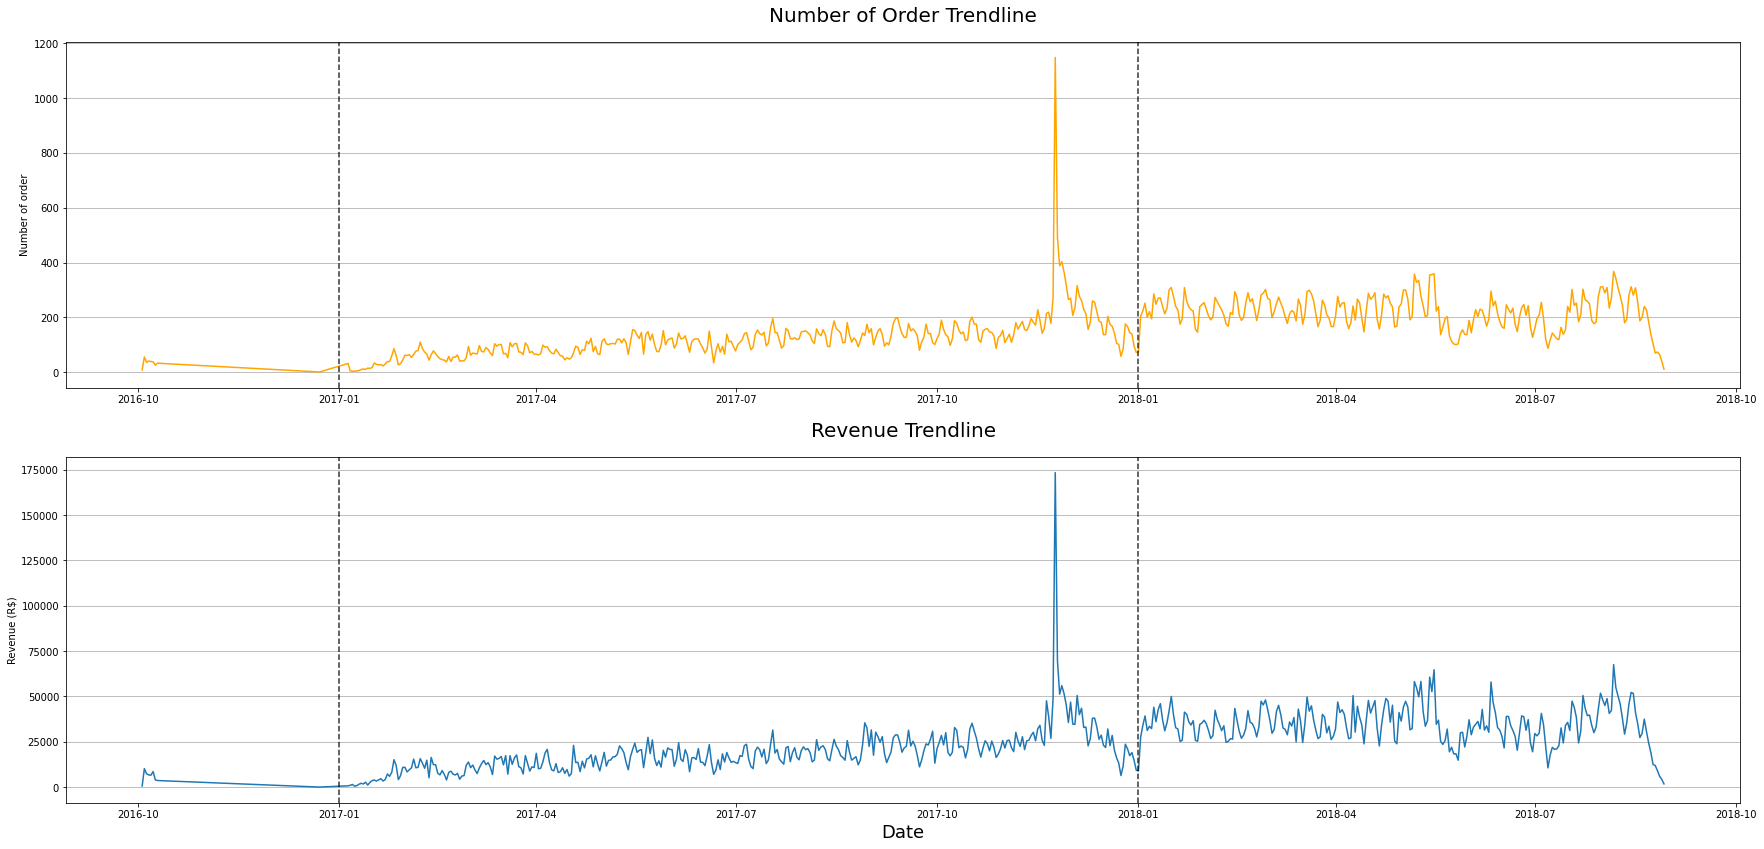

In [35]:
def create_trend_plot(ax, data, title, ylabel):
    data.plot(kind = 'line', ax = ax, color = 'orange' if ylabel == 'Number of order' else None)
    for date in [pd.to_datetime('2017-01-01'), pd.to_datetime('2018-01-01')]:
        ax.axvline(x = date, linestyle = '--', color = 'black', alpha = 0.8)
    ax.set_xlabel('')
    ax.set_ylabel(ylabel)
    ax.set_title(title, pad=20, fontsize='20')
    ax.grid(axis='y')

fig, axes = plt.subplots(2, 1, figsize=(30, 14))

create_trend_plot(axes[0], order_revenue_trend.orders, 'Number of Order Trendline', 'Number of order')
create_trend_plot(axes[1], order_revenue_trend.revenue, 'Revenue Trendline', 'Revenue (R$)')

axes[1].set_xlabel('Date', fontsize='18')

plt.show()

### **Revenue Based on Day**

In [45]:
df_revenue_day = df.copy()
df_revenue_day['order_purchase_day'] = df_revenue_day['order_purchase_timestamp'].dt.day_name()
df_revenue_day.head(2)

df_revenue_day_grp = df_revenue_day.groupby('order_purchase_day').agg(orders = ('order_item_count', 'sum')).reset_index().sort_values(by = 'orders')
df_revenue_day_grp

,order_purchase_day,orders
2,Saturday,11687
3,Sunday,12975
0,Friday,15524
4,Thursday,16278
6,Wednesday,16953
5,Tuesday,17652
1,Monday,17685


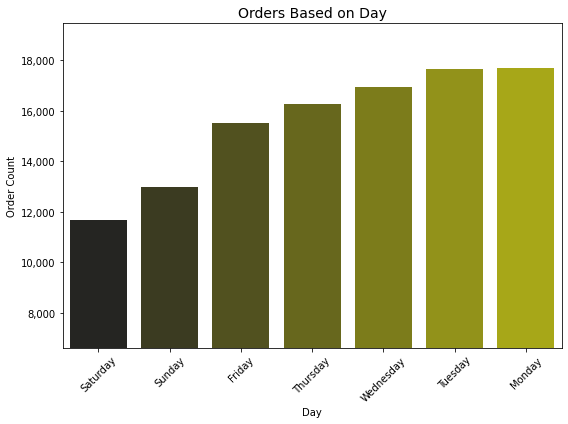

In [57]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'order_purchase_day', y = 'orders',
            hue = 'order_purchase_day',
            data = df_revenue_day_grp,
            palette = 'dark:y')

plt.title('Orders Based on Day',
          fontsize = '14')
plt.xlabel('Day')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(df_state['total_revenue'].min() * 0.9, df_revenue_day_grp['orders'].max() * 1.1)
plt.ylabel('Order Count')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### **Transaction Count based on Purchase Time**

In [60]:
df_trans_time = df.copy()
df_trans_time.head(2)

,customer_id,customer_unique_id,order_id,seller_id,product_cat_name,order_item_count,shipping_limit_date,price,freight_value,payment_value,payment_type,payment_installments,payment_sequential,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,order_purchase_month_name
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,1,2017-05-03,239.9,19.93,259.83,credit_card,3,1,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,4,2017-05-13,2017-05-15 11:34:13,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,April
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,furniture_decor,1,2018-01-18,199.0,17.87,216.87,credit_card,5,1,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5,2018-01-23,2018-01-23 16:06:31,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,January


,time_category,order_id
0,Afternoon,36319
1,Evening,16737
2,Late Evening,20945
3,Late at Night,4262
4,Morning,14861


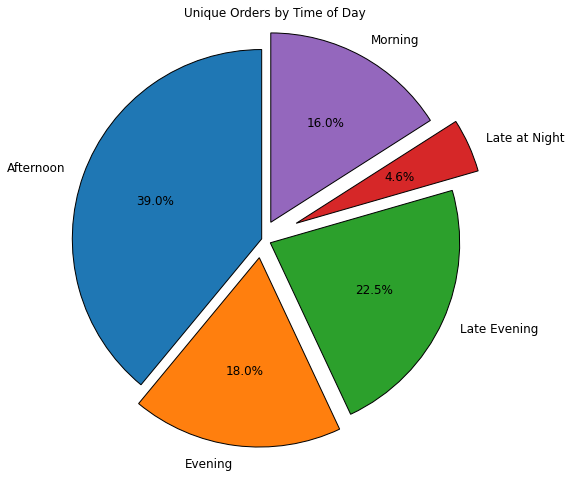

In [78]:
def categorize_time(hour):
    if hour < 5:
        return 'Late at Night'
    elif hour < 11:
        return 'Morning'
    elif hour < 17:
        return 'Afternoon'
    elif hour < 20:
        return 'Evening'
    else:
        return 'Late Evening'
    
df_trans_time['time_category'] = pd.to_datetime(df_trans_time['order_purchase_timestamp']).dt.hour.apply(categorize_time)

df_trans_time_grp = df_trans_time.groupby('time_category')['order_id'].nunique().reset_index()
display(df_trans_time_grp.head())

plt.figure(figsize = (8, 8), 
           facecolor = 'white')
plt.pie(df_trans_time_grp['order_id'], labels = df_trans_time_grp.time_category, 
        autopct = '%1.1f%%', 
        startangle = 90,
        textprops = {'fontsize': 12},
        explode = (0, .1, .05, .2, .1),
        wedgeprops = {'edgecolor': 'black'})
plt.title('Unique Orders by Time of Day')
plt.axis('equal')
plt.show()

### **Freight Value Average**

In [51]:
state_shipment_value = df[['freight_value', 'customer_state', 'seller_state']].copy()
state_shipment_value = state_shipment_value.sort_values(by = ['seller_state', 'customer_state'])
state_shipment_value.tail()

,freight_value,customer_state,seller_state
98703,37.04,TO,SP
99263,23.46,TO,SP
99298,26.67,TO,SP
99483,38.60,TO,SP
99674,25.63,TO,SP


#### **Heatmap**

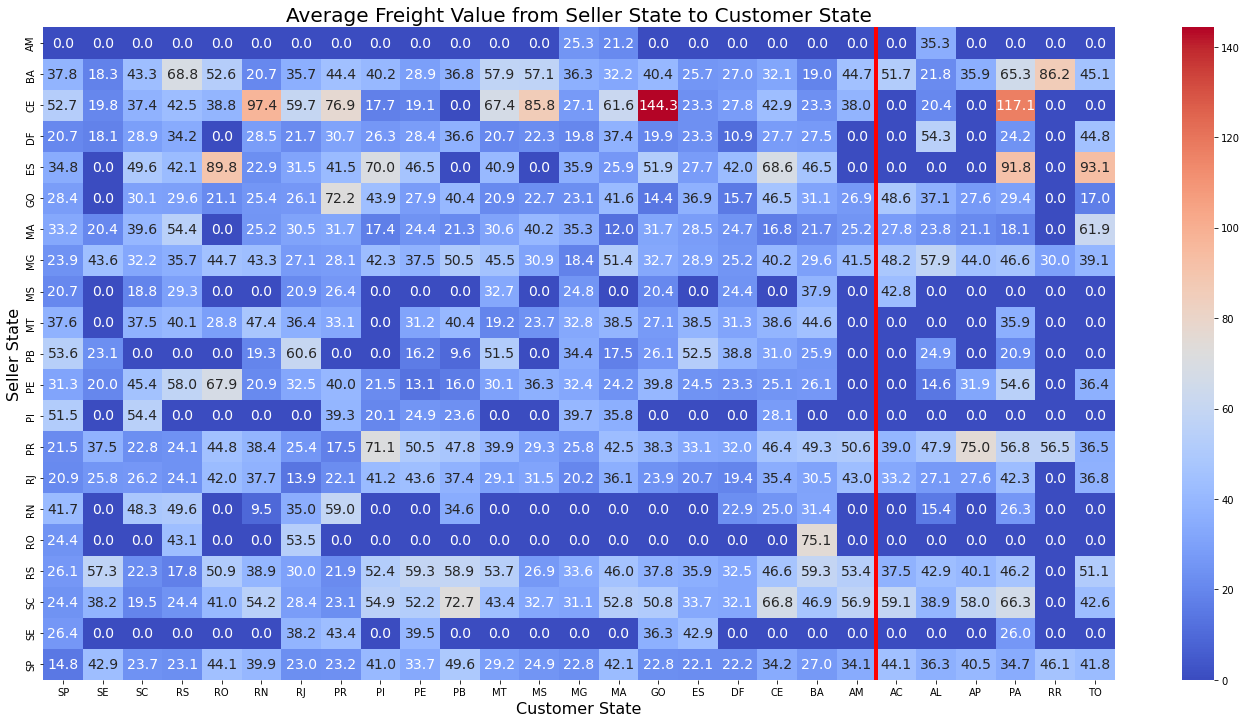

In [52]:
pv_state_shipment_value = pd.pivot_table(data = state_shipment_value,
                                         index = 'seller_state',
                                         columns = 'customer_state',
                                         values = 'freight_value',
                                         aggfunc = 'mean')

pv_state_shipment_value.sort_index(inplace=True)

unique_seller_states = pv_state_shipment_value.index.unique()
unique_customer_states = pv_state_shipment_value.columns

missing_states = [state for state in unique_customer_states if state not in unique_seller_states]

reversed_seller_states = sorted(unique_seller_states, reverse=True)

final_customer_state_order = reversed_seller_states + missing_states

pv_state_shipment_value = pv_state_shipment_value.reindex(columns=final_customer_state_order).fillna(0)

plt.figure(figsize=(24, 12))
sns.heatmap(pv_state_shipment_value, annot = True, cmap = 'coolwarm', fmt = '.1f', 
            annot_kws = {'size': 14})

vline_position = len(reversed_seller_states)
plt.axvline(x = vline_position, 
            color = 'red', 
            linewidth = 4)

plt.title('Average Freight Value from Seller State to Customer State', fontsize = 20)
plt.xlabel('Customer State', fontsize = 16)
plt.ylabel('Seller State', fontsize = 16)
plt.show()

#### **Barchart**

Percentage of Customers Buying from Different State: 64.08%


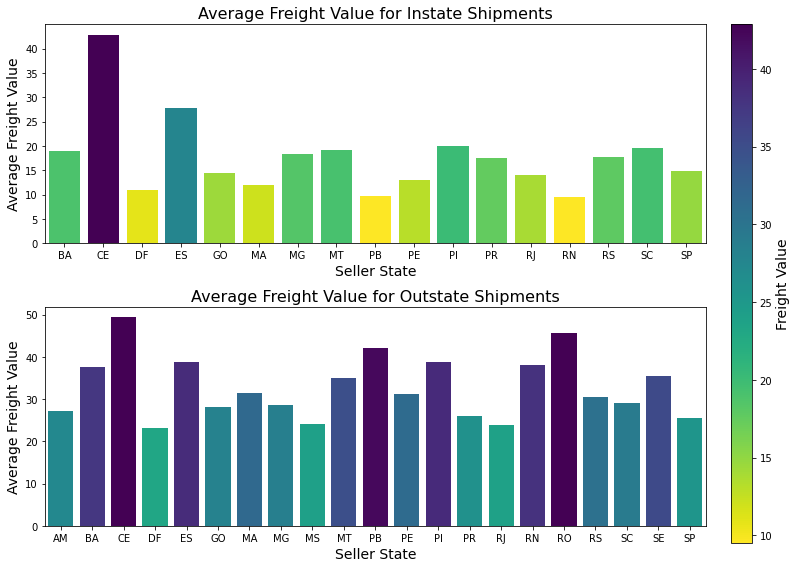

In [78]:
instate_shipment = state_shipment_value[state_shipment_value.customer_state == state_shipment_value.seller_state].reset_index(drop=True)
instate_shipment_avg = instate_shipment.groupby('seller_state')[['freight_value']].mean().reset_index().sort_values(by='seller_state')

outstate_shipment = state_shipment_value[state_shipment_value.customer_state != state_shipment_value.seller_state].reset_index(drop=True)
outstate_shipment_avg = outstate_shipment.groupby('seller_state')[['freight_value']].mean().reset_index().sort_values(by='seller_state')

percentage = round((len(outstate_shipment) / len(state_shipment_value) * 100), 2)
print(f'Percentage of Customers Buying from Different State: {percentage}%')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

bars1 = sns.barplot(x='seller_state', y='freight_value', data=instate_shipment_avg, palette='viridis_r', ax=axes[0])  
axes[0].set_title('Average Freight Value for Instate Shipments', fontsize=16)
axes[0].set_xlabel('Seller State', fontsize=14)
axes[0].set_ylabel('Average Freight Value', fontsize=14)

bars2 = sns.barplot(x='seller_state', y='freight_value', data=outstate_shipment_avg, palette='viridis_r', ax=axes[1])  
axes[1].set_title('Average Freight Value for Outstate Shipments', fontsize=16)
axes[1].set_xlabel('Seller State', fontsize=14)
axes[1].set_ylabel('Average Freight Value', fontsize=14)

norm = plt.Normalize(instate_shipment_avg['freight_value'].min(), instate_shipment_avg['freight_value'].max())
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)  
sm.set_array([])

cbar_ax = fig.add_axes([1.02, .05, .03, .9])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Freight Value', fontsize=14)

for bar in bars1.patches:
    bar.set_facecolor(sm.to_rgba(bar.get_height()))
for bar in bars2.patches:
    bar.set_facecolor(sm.to_rgba(bar.get_height()))

plt.tight_layout()
plt.show()

### **Sellers Average Revenue**

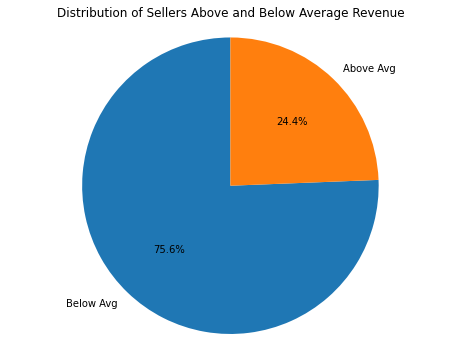

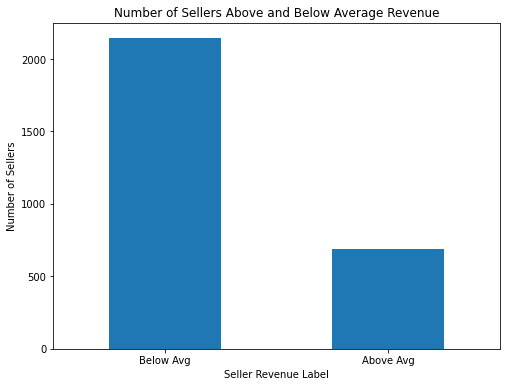

In [182]:
df_seller_avg_revenue = df.groupby(['seller_id', 'order_id'])[['payment_value']].first().reset_index()

df_seller_avg_revenue = df_seller_avg_revenue.groupby('seller_id').agg(
    orders=('order_id', 'nunique'),
    revenue=('payment_value', 'sum')
).reset_index()

df_seller_avg_revenue['avg_revenue'] = round(df_seller_avg_revenue.revenue / df_seller_avg_revenue.orders, 2)

avg_revenue = df_seller_avg_revenue.avg_revenue.mean()

df_seller_avg_revenue['label'] = df_seller_avg_revenue['avg_revenue'].apply(
    lambda x: 'Above Avg' if x > avg_revenue else 'Below Avg'
)

label_counts = df_seller_avg_revenue['label'].value_counts()

plt.figure(figsize = (8, 6), facecolor = 'white')
plt.pie(label_counts, labels =  label_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of Sellers Above and Below Average Revenue')
plt.axis('equal')
plt.show()

plt.figure(figsize = (8, 6))
label_counts.plot(kind = 'bar') 
plt.title('Number of Sellers Above and Below Average Revenue')
plt.xlabel('Seller Revenue Label')
plt.ylabel('Number of Sellers')
plt.xticks(rotation = 0)
plt.show()

## **Prescriptive Analytics**

### Menguji Perbedaan Rata - rata Skor Ulasan Berdasarkan Payment Type

In [21]:
anova_result = stats.f_oneway(
    df[df['payment_type'] == 'credit_card']['review_score'],
    df[df['payment_type'] == 'boleto']['review_score'],
    df[df['payment_type'] == 'voucher']['review_score'],
    df[df['payment_type'] == 'debit_card']['review_score']
)

print(f'p-value : {anova_result.pvalue.round(4)}')

if anova_result.pvalue < 0.05:
    print('H0 Ditolak: Ada perbedaan rata-rata skor ulasan antara setidaknya satu kategori pembayaran.')
else:
    print('H0 Gagal ditolak: Rata-rata skor ulasan sama untuk semua kategori pembayaran.')

p-value : 0.0221
H0 Ditolak: Ada perbedaan rata-rata skor ulasan antara setidaknya satu kategori pembayaran.


### Menguji korelasi antara Payment Type & Product Category

In [37]:
contingency_table = pd.crosstab(df['payment_type'], df['product_cat_name'])


chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f'p-value : {p_value.round(4)}')

if p_value < 0.05:
    print('H0 Ditolak: Ada hubungan antara metode pembayaran dan kategori produk')
else:
    print('H0 Gagal ditolak: Tidak ada hubungan antara metode pembayaran dan kategori produk')

p-value : 0.0
H0 Ditolak: Ada hubungan antara metode pembayaran dan kategori produk


### Menguji Korelasi antara Kategori Produk dan Review Score

In [35]:
biserial_corr = stats.pointbiserialr(df['product_cat_name'].astype('category').cat.codes, df['review_score'])

print(f'p-value : {biserial_corr.pvalue.round(4)}')

if biserial_corr.pvalue < 0.05:
    print("Ditolak: Ada hubungan antara kategori produk dan skor ulasan.")
else:
    print("Gagal ditolak: Tidak ada hubungan antara kategori produk dan skor ulasan.")

p-value : 0.0
Ditolak: Ada hubungan antara kategori produk dan skor ulasan.


### **Menguji Apakah dengan Adanya Free Shipment Bisa Meningkatkan Volume Order**

In [88]:
df['revenue_free_shipment'] = df['price'] - df['freight_value']

order_count = df.groupby('seller_id').agg(
    order_count = ('order_id', 'nunique'),
    free_shipping_revenue = ('revenue_free_shipment', lambda x: x[df['freight_value'] == 0].sum()),
    paid_shipping_revenue = ('payment_value', lambda x: x[df['freight_value'] > 0].sum())
).reset_index()

free_shipping = order_count[order_count['free_shipping_revenue'] > 0]['order_count']
paid_shipping = order_count[order_count['paid_shipping_revenue'] > 0]['order_count']

# Uji T
t_stat, p_value_t = stats.ttest_ind(free_shipping, paid_shipping)

# Uji Mann-Whitney U
u_stat, p_value_mw = stats.mannwhitneyu(free_shipping, paid_shipping)

# Hasil Uji T
print(f'p-value T-Test : {p_value_t.round(4)}')
if p_value_t < 0.05:
    print('H0 Ditolak : Ada perbedaan yang signifikan dalam volume order\nantara pengiriman gratis dan berbayar.\n')
else:
    print('H0 Gagal ditolak : Tidak ada perbedaan yang signifikan dalam volume order\n\n')

# Hasil Uji Mann-Whitney U
print(f'p-value Mann-Whitney U : {p_value_t.round(4)}')
if p_value_mw < 0.05:
    print('H0 Ditolak: Ada perbedaan yang signifikan dalam volume order\nantara pengiriman gratis dan berbayar.\n')
else:
    print('H0 Gagal ditolak: Tidak ada perbedaan yang signifikan dalam volume order.\n')
    
# Uji satu sisi dengan Uji T
print(f'p-value T-Test : {round(p_value_t/2, 4)}')
if p_value_t / 2 < 0.05 and t_stat > 0:
    print('H0 Ditolak: Penghapusan biaya pengiriman meningkatkan volume order.')
else:
    print('H0 Gagal ditolak: Tidak ada cukup bukti untuk menyatakan bahwa penghapusan biaya pengiriman meningkatkan volume order.')

p-value T-Test : 0.0
H0 Ditolak : Ada perbedaan yang signifikan dalam volume order
antara pengiriman gratis dan berbayar.

p-value Mann-Whitney U : 0.0
H0 Ditolak: Ada perbedaan yang signifikan dalam volume order
antara pengiriman gratis dan berbayar.

p-value T-Test : 0.0
H0 Ditolak: Penghapusan biaya pengiriman meningkatkan volume order.
